In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data_df = pd.read_csv("./color_histogram.csv")

In [63]:
data_df

,Classifier,Accuracy,Precision,Recall,F1_Score,Trainning_Time,Method
0,KNN,85.203028,79.977477,84.466237,81.479049,3.183272,SMOTE
1,Random Forest,77.598073,72.215790,77.328478,72.459143,7.894038,SMOTE
2,"SVM: {gamma=2, C=1}",89.538885,86.953518,88.537473,87.631207,95.887815,SMOTE
3,MLP,64.452856,58.766582,63.091761,56.715157,133.285622,SMOTE
4,XGBoost,96.283551,95.620846,95.452193,95.529921,165.792817,SMOTE
5,KNN,83.929800,80.994886,80.324924,80.088419,1.116210,NOT_SMOTE
6,Random Forest,75.326910,68.590800,60.143088,60.645320,2.106262,NOT_SMOTE
7,"SVM: {gamma=2, C=1}",87.233310,85.865233,82.942980,84.245577,27.858757,NOT_SMOTE
8,MLP,63.936683,49.688092,47.604667,46.504103,74.723726,NOT_SMOTE
9,XGBoost,96.455609,95.929378,95.421672,95.664932,68.195060,NOT_SMOTE


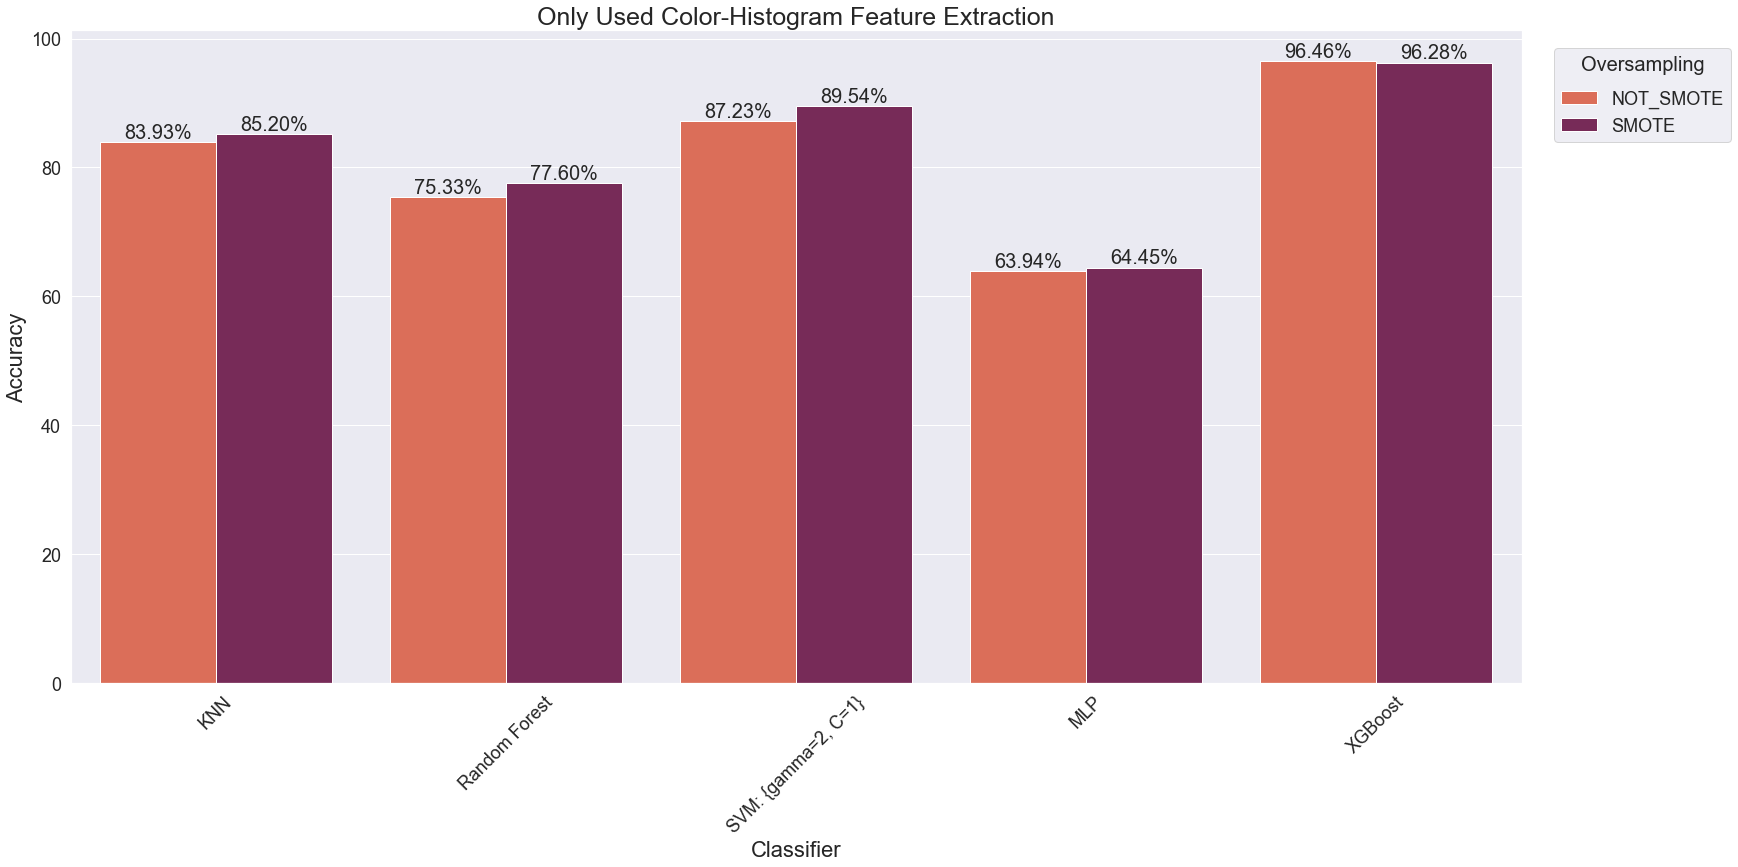

In [71]:
import numpy as np
sns.set(style="darkgrid")

fig, ax= plt.subplots(figsize=(26, 12))
ax = sns.barplot(
    data=data_df, 
    x="Classifier", 
    y="Accuracy", 
    palette = 'rocket_r', 
    hue="Method", 
    hue_order=["NOT_SMOTE", "SMOTE"]
)

ax.set_xlabel(ax.get_xlabel(),fontsize=22)
ax.set_ylabel(ax.get_ylabel(),fontsize=22)
ax.set_title("Only Used Color-Histogram Feature Extraction", fontsize=25)

value_percent = data_df["Accuracy"].values
value_percent = [(f"{v:.2f}%", f"{v:.2f}%") for v in value_percent]

for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_fontsize(18)

for item in ax.get_yticklabels():
    item.set_fontsize(18)


a = {
    0: np.array([f"{v[0]:.2f}%" for v in data_df[["Accuracy", "Method"]].values.tolist() if v[1] == "NOT_SMOTE"]), 
    1: np.array([f"{v[0]:.2f}%" for v in data_df[["Accuracy", "Method"]].values.tolist() if v[1] == "SMOTE"])
}
for index, container in enumerate(ax.containers):
    ax.bar_label(container, a[index], fontsize=20)

legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1, prop={'size': 18})

legend.set_title("Oversampling", prop={'size': 20})
legend._legend_box.sep=15